In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Kor_income.csv
동일한 사람을 일정 주기로 임금을 분석한 데이터
  
1. id: 고유 식별 번호
2. year: 데이터를 측정한 연도.   
       +) wave: 2005년을 1로하여 2018년을 가리키는 14까지 있다
3. region: 7개의 행정구역으로 구분   
       1) 서울 2) 경기 3) 경남 4) 경북 5) 충남 6) 강원, 충북 7) 전라, 제주  
4. family_member: 가족의 수
5. gender: 성별   
       1) male 2) female
6. year_born: 출생년도
7. education_level: 교육 수준   
       1) 7세 미만 2) 7세 이상 & 교육X 3) 초등학교 4) 중학교
       5) 고등학교 6) 대학교 7) 학사 8) 석사 9) 박사
8. marriage: 결혼 여부   
       1) 불가능(18세 이하) 2) 기혼 3) 사별 4) 이혼(separated) 5) 미혼 6) 기타
9. religion: 종교를 가지고 있는지 여부   
       1) yes 2) no
10. occupation: 직업 분류   
        1) 관리자 2) 전문가 및 관련 종사자 3) 사무 종사자 4) 서비스 종사자 5) 판매 종사자
        6) 농림, 어업 숙련 종사자 7) 기능원 및 관련 기능 종사자 8) 장치, 기계 조작 및 조립 종사자 9) 단순 노무 종사자
11. company_size: 회사 규모?   
12. reason_none_worker: 일을 하지 않는 이유   
        1) no capable 2) 군 복무 중 3) 학생 4) 진학 준비 중 5) 구직자 6) 가사노동
        7) 보육 8) 간호, 간병 9) 경제활동 포기 10) 일할 의지 없음 11) 기타 A) 군인


# 1단계: 데이터 전처리

In [93]:
data = pd.read_csv("Kor_income.csv", index_col=0)
data.head(10)

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.0
67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.0
38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.0
72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.0
21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.0
17575,16890101,2007,3,3,3,1,1937,4,1,1,912,3,,1502.0
25998,24350101,2005,1,2,2,1,1940,5,1,2,,,,1837.0
35131,32280101,2015,11,3,4,1,1975,7,1,2,235,10,,8455.0
18518,17600101,2016,12,3,3,1,1967,7,5,2,,,,1570.0
33507,30810101,2007,3,5,5,1,1968,5,1,2,811,3,,4190.0


In [94]:
#from google.colab import drive
#drive.mount('/content/drive')

In [95]:
data[data.id == data.iloc[0].id].sort_values(by='year') # 같은 id의 사람을 대상으로 총 14년동안 임금을 계산한 것을 확인할 수 있다

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.0
77531,68460101,2006,2,3,1,2,1940,2,2,1,611,1,,669.0
77532,68460101,2007,3,3,1,2,1940,2,2,1,611,1,,1063.0
77533,68460101,2008,4,3,1,2,1940,2,2,1,611,1,,640.0
77534,68460101,2009,5,3,1,2,1940,2,2,1,611,1,,1321.0
77535,68460101,2010,6,3,1,2,1940,2,2,1,611,1,,3080.0
77536,68460101,2011,7,3,1,2,1940,2,2,2,611,1,,838.0
77537,68460101,2012,8,3,1,2,1940,2,2,1,611,1,,1057.0
77538,68460101,2013,9,3,1,2,1940,2,2,1,611,1,,1806.0
77539,68460101,2014,10,3,1,2,1940,2,2,1,,,10,599.0


## 결측치 확인 및 처리  

In [96]:
data.info() # 수치형 데이터인 듯 보이는 occupation, company_size, reason_none_worker의 dtype이 str인 것이 이상하다

<class 'pandas.core.frame.DataFrame'>
Index: 78928 entries, 77530 to 759
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78928 non-null  int64  
 1   year                78928 non-null  int64  
 2   wave                78928 non-null  int64  
 3   region              78928 non-null  int64  
 4   family_member       78928 non-null  int64  
 5   gender              78928 non-null  int64  
 6   year_born           78928 non-null  int64  
 7   education_level     78928 non-null  int64  
 8   marriage            78928 non-null  int64  
 9   religion            78928 non-null  int64  
 10  occupation          78928 non-null  object 
 11  company_size        78928 non-null  object 
 12  reason_none_worker  78928 non-null  object 
 13  income              78928 non-null  float64
dtypes: float64(1), int64(10), object(3)
memory usage: 9.0+ MB


In [97]:
data.duplicated().sum() # 우선 중복된 값은 없다는 것을 확인했습니다.

0

In [98]:
data.isnull().sum() # 결측치는 없어 보이지만

id                    0
year                  0
wave                  0
region                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
income                0
dtype: int64

In [99]:
data.iloc[0] # reason_none_worker가 비어 있는 것을 확인할 수 있고
## worker 상태(occupation이 비어있지 않음)이기 때문에 reason none worker(일하지 않는 이유)가 적혀있지 않은 것 같음

id                    68460101
year                      2005
wave                         1
region                       3
family_member                1
gender                       2
year_born                 1940
education_level              2
marriage                     2
religion                     1
occupation                 617
company_size                 1
reason_none_worker            
income                   460.0
Name: 77530, dtype: object

In [100]:
data.iloc[1] # occupation과 company_size가 비어있는 것을 확인할 수 있다
## 이 경우 worker 상태가 아니라서 occupation과 company size가 비어있는 것 같음
## occupation이 비어있지 않으면 company size가 채워져있고, 비어있으면 reason none worker가 채워져 있는듯

id                    59620101
year                      2018
wave                        14
region                       4
family_member                3
gender                       1
year_born                 1939
education_level              5
marriage                     1
religion                     2
occupation                    
company_size                  
reason_none_worker           9
income                  1713.0
Name: 67016, dtype: object

In [101]:
data.iloc[0].reason_none_worker # 값을 찍어보면 공백으로 처리되어 빈값이 없어 보였던 것이다 --> 처리가 필요해 보인다

' '

In [102]:
columns = ['occupation', 'company_size', 'reason_none_worker']
for x in columns:
    data[x] = data[x].apply(lambda x: x.strip()) # 해당 컬럼에 공백을 제거하고
    data.loc[data[x] == '', x] = np.NaN         # 빈칸을 갖고 있는 행을 추출하여 해당 칼럼에 NaN을 넣는다

In [103]:
data.head()

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,NaN,460.0
67016,59620101,2018,14,4,3,1,1939,5,1,2,NaN,NaN,9,1713.0
38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,NaN,2854.0
72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,NaN,4290.0
21862,20620101,2017,13,4,2,1,1940,2,1,2,NaN,NaN,10,1608.0


In [104]:
data.isnull().sum() # 세 열에 상당한 양의 결측치가 있는 것을 확인할 수 있다 (전체 데이터 79000개)

id                        0
year                      0
wave                      0
region                    0
family_member             0
gender                    0
year_born                 0
education_level           0
marriage                  0
religion                  0
occupation            28652
company_size          28651
reason_none_worker    51533
income                    0
dtype: int64

In [105]:
#data.drop(columns, axis=1, inplace=True) # 결측치가 많은 세 열을 제거한다 or 다른 방식으로 처리?
#data.head()

## Occupation

In [106]:
# 맨 앞자리 1: 관리자 2: 전문가 및 관련 종사자 3: 사무 종사자 4: 서비스 종사자 5: 판매 종사자
# 6: 농림, 어업 숙련 종사자 7: 기능원 및 관련 기능 종사자 8: 장치, 기계 조작 및 조립 종사자 9: 단순 노무 종사자

# 100단위로 자르는 게 아니라 맨 앞에 1이 오냐, 2가 오냐 등으로 해서 분류되는 것 같습니다.
data.occupation.value_counts()

occupation
611     8527
941     2345
873     2217
312     1874
311     1399
        ... 
828        1
1009       1
122        1
12         1
113        1
Name: count, Length: 243, dtype: int64

In [107]:
# 따라서 type이 str인 경우에는 맨 앞의 분류 코드로 대체해서 occupation의 데이터를 간소화하는 방법을 적용했습니다.
data['occupation'] = data['occupation'].apply(lambda x : x[0] if type(x) == str else x)

In [108]:
data.head()

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
77530,68460101,2005,1,3,1,2,1940,2,2,1,6,1,NaN,460.0
67016,59620101,2018,14,4,3,1,1939,5,1,2,NaN,NaN,9,1713.0
38931,35960101,2012,8,2,3,1,1967,6,3,1,5,1,NaN,2854.0
72033,63870101,2011,7,4,5,1,1947,3,1,1,6,1,NaN,4290.0
21862,20620101,2017,13,4,2,1,1940,2,1,2,NaN,NaN,10,1608.0


In [109]:
data.occupation.value_counts()

occupation
6    9668
9    9283
8    6234
3    5332
7    5320
2    4791
5    3994
4    3415
1    2239
Name: count, dtype: int64

## reason_none_worker

In [110]:
data.reason_none_worker.value_counts()

reason_none_worker
10    16223
8      3642
9      2295
1      2148
7       958
6       921
4       609
5       285
11      197
99       64
3        45
2         7
0         1
Name: count, dtype: int64

In [111]:
data[data.reason_none_worker == '99'].head()

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
48615,45040101,2007,3,6,3,1,1935,3,1,1,NaN,NaN,99,3685.0
46541,43330101,2007,3,2,3,1,1952,3,1,2,NaN,NaN,99,1605.0
40469,37590101,2005,1,2,3,1,1974,7,1,2,NaN,NaN,99,694.0
3814,3620101,2005,1,1,1,2,1958,3,5,1,NaN,NaN,99,720.0
40759,37840101,2007,3,2,2,2,1939,3,3,2,NaN,NaN,99,819.0


In [112]:
data[data.reason_none_worker == '99'].id.duplicated().sum() # 이 중 id가 겹치는 건 1개 밖에 되지 않음(1쌍을 제외하고는 모두 다른 id)

1

In [113]:
# reason_none_worker이 99인 경우에는 occupation도 모두 0이다(실제로 reason_none_worker값이 있는 것은 맞음) --> 기타(11)로 처리
len(data[(data.reason_none_worker == '99') & (data.occupation.notnull())])

0

In [114]:
# 이 경우도 reason_none_worker값이 있는 것은 맞음 --> 이 값도 11로 처리한다
data[data.reason_none_worker == '0']

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
8687,8350101,2008,4,7,4,1,1974,7,1,2,NaN,NaN,0,4242.0


In [115]:
# reason_none_worker이 0이거나 99인 경우(이상치), 11(기타)로 대체하였다
data.loc[(data.reason_none_worker == '0') | (data.reason_none_worker == '99'), 'reason_none_worker'] = 11

## company_size

In [116]:
data.company_size.value_counts()

company_size
1     24089
10     5844
3      5446
2      4808
7      2938
4      2280
5      1582
6      1163
9       919
8       865
11      335
99        8
Name: count, dtype: int64

In [117]:
len(data[data.company_size.isnull()]) # 해당 column에 NaN값이 총 28651개 있다

28651

In [118]:
len(data[(data.company_size.isnull()) & (data.occupation.isnull())]) # occupation이 없는 경우에 company_size도 없다는 것을 확인할 수 있다

28651

In [119]:
data[(data.company_size.notnull()) & (data.occupation.isnull())] # company_size가 NaN이 아닌데 occupation이 NaN인 경우는 오직 1개 있다

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
2109,2050101,2005,1,1,2,1,1942,2,1,1,NaN,99,9,600.0


In [120]:
# occupation이 없는데 company_size가 있는 것은 말이 되지 않으므로 이 경우 company_size를 0으로 대체한다
data.loc[(data.company_size.notnull()) & (data.occupation.isnull()), 'company_size'] = 0

In [121]:
data[(data.company_size.notnull()) & (data.occupation.isnull())] # 0으로 바뀐 것을 확인할 수 있다

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
2109,2050101,2005,1,1,2,1,1942,2,1,1,NaN,0,9,600.0


In [122]:
# 이 경우는 company_size의 값이 너무 적어서 이상치 같은데 그렇다고 occupation이 NaN인 것도 아니므로 최빈값이 1로 대체하는 것으로 한다
data[data.company_size == '99']

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
45789,42660101,2005,1,2,5,1,1957,8,1,9,7,99,NaN,12240.0
10835,10470101,2008,4,1,5,1,1970,5,1,2,7,99,NaN,3227.0
37081,34220101,2005,1,2,4,1,1963,4,1,2,8,99,NaN,3665.0
4881,4640101,2005,1,1,2,1,1968,5,1,2,8,99,NaN,5300.0
46194,43010101,2005,1,2,4,1,1944,2,1,2,6,99,NaN,5970.0
49152,45470101,2005,1,6,2,1,1977,7,1,2,3,99,NaN,5556.0
6407,6070101,2005,1,1,4,1,1965,7,1,1,8,99,NaN,3644.0


In [123]:
data.loc[data.company_size == '99', 'company_size'] = 1

## occupation, reason_none_worker, company_size 결측치 처리 및 형변환
1. 기초적인 이상치들에 대해 처리를 마친 상태이다
2. NaN은 결측치이지만 해당하는 행이나 열을 지우기에는 해당 데이터의 양이 많고 income을 예측하는 모델을 설계하는데 유의미한 데이터로 판단된다
3. 따라서 NaN은 0으로 처리한다
4. 또한 현재 dtype이 object(str)이므로 이를 정수로 변환한다

In [124]:
data.fillna(0, inplace=True) # 3. 결측치(NaN)은 0으로 대체한다

In [125]:
data.info() # 아직 occupation, company_size, reason_none_worker이 int형이 아니다

<class 'pandas.core.frame.DataFrame'>
Index: 78928 entries, 77530 to 759
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78928 non-null  int64  
 1   year                78928 non-null  int64  
 2   wave                78928 non-null  int64  
 3   region              78928 non-null  int64  
 4   family_member       78928 non-null  int64  
 5   gender              78928 non-null  int64  
 6   year_born           78928 non-null  int64  
 7   education_level     78928 non-null  int64  
 8   marriage            78928 non-null  int64  
 9   religion            78928 non-null  int64  
 10  occupation          78928 non-null  object 
 11  company_size        78928 non-null  object 
 12  reason_none_worker  78928 non-null  object 
 13  income              78928 non-null  float64
dtypes: float64(1), int64(10), object(3)
memory usage: 9.0+ MB


In [126]:
# 4. occupation, company_size, reason_none_worker을 int형으로 변환
columns = ['occupation', 'company_size', 'reason_none_worker']
for x in columns:
    data[x] = data[x].apply(lambda x: int(x))

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78928 entries, 77530 to 759
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78928 non-null  int64  
 1   year                78928 non-null  int64  
 2   wave                78928 non-null  int64  
 3   region              78928 non-null  int64  
 4   family_member       78928 non-null  int64  
 5   gender              78928 non-null  int64  
 6   year_born           78928 non-null  int64  
 7   education_level     78928 non-null  int64  
 8   marriage            78928 non-null  int64  
 9   religion            78928 non-null  int64  
 10  occupation          78928 non-null  int64  
 11  company_size        78928 non-null  int64  
 12  reason_none_worker  78928 non-null  int64  
 13  income              78928 non-null  float64
dtypes: float64(1), int64(13)
memory usage: 9.0 MB


## 나머지 column별 값의 종류 확인하기

In [128]:
data.id.value_counts() # 총 9930명에 대한 데이터이다

id
55620101    14
11410101    14
38460101    14
13330101    14
22380101    14
            ..
86920701     1
60290101     1
17910101     1
86100701     1
52030901     1
Name: count, Length: 9930, dtype: int64

In [129]:
data.year.value_counts() # 데이터가 수집된 년도

year
2011    6385
2012    6230
2005    6047
2013    6004
2014    5894
2015    5733
2006    5650
2016    5592
2017    5454
2018    5341
2008    5340
2007    5326
2009    5076
2010    4856
Name: count, dtype: int64

In [130]:
# 1: 2005년 2: 2006년 ... 14: 2018년
data.wave.value_counts() # year과 정확하게 동일하다는 것을 확인할 수 있다

# year이나 wave 중 하나의 열은 불필요하지 않을까?

wave
7     6385
8     6230
1     6047
9     6004
10    5894
11    5733
2     5650
12    5592
13    5454
14    5341
4     5340
3     5326
5     5076
6     4856
Name: count, dtype: int64

In [131]:
# 1: male 2: female
data.gender.value_counts()

gender
1    55554
2    23374
Name: count, dtype: int64

In [132]:
# 1: 서울 2: 경기 3: 경남 4: 경북 5: 충남 6: 강원, 충북 7: 전라, 제주
data.region.value_counts()

region
2    16505
3    13770
7    13576
1    12252
4    10270
5     6633
6     5922
Name: count, dtype: int64

In [133]:
# 출생년도
data.year_born.value_counts()

year_born
1942    2468
1939    2190
1938    2066
1937    2026
1940    2002
        ... 
1998       5
1913       4
1999       3
1912       1
2002       1
Name: count, Length: 90, dtype: int64

In [134]:
# 교육수준

# 1: 7세 미만 2: 7세 이상 & 교육X 3: 초등학교 4: 중학교
# 5: 고등학교 6: 대학교 7: 학사 8: 석사 9: 박사

data.education_level.value_counts() # 1은 없음(7세 미만)

education_level
5    22264
3    18007
7    11910
4    10364
2     9243
6     5027
8     1886
9      227
Name: count, dtype: int64

In [135]:
# 7세 이상인데 education_level이 1(7세 미만)이라 된 경우가 없다(간단히 이상치를 체크해 본 결과 문제 없는 데이터이다)
data[(data.year-data.year_born > 7) & (data.education_level == 1)] 

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income


In [136]:
data.family_member.value_counts()

family_member
2    24367
1    21377
4    14311
3    13593
5     4133
6      936
7      179
8       24
9        8
Name: count, dtype: int64

In [137]:
#1) 불가능(18세 이하) 2) 기혼 3) 사별 4) 이혼(separated) 5) 미혼 6) 기타
data.marriage.value_counts() # 0, 9는 이상치이므로 처리가 필요하다

marriage
1    48481
2    18138
3     6312
5     4968
4      959
6       50
0       13
9        7
Name: count, dtype: int64

In [138]:
# 1) Yes 2) No
data.religion.value_counts() # 9는 이상치이므로 처리가 필요하다

religion
1    39776
2    39105
9       47
Name: count, dtype: int64

## 이상치 제거

### marriage 이상치 처리
marriage는 1부터 6까지의 값이니 0과 9에 대한 처리가 필요하다

In [139]:
#1) 불가능(18세 이하) 2) 기혼 3) 사별 4) 이혼(separated) 5) 미혼 6) 기타
data.marriage.value_counts() # 0, 9는 이상치이므로 처리가 필요하다

marriage
1    48481
2    18138
3     6312
5     4968
4      959
6       50
0       13
9        7
Name: count, dtype: int64

In [140]:
data[(data.marriage == 0) | (data.marriage == 9)] # 이상치 출력

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
51543,47300101,2008,4,6,1,2,1943,3,9,2,0,0,8,734.0
58282,52680101,2005,1,7,1,1,1992,4,0,2,0,0,0,185.0
48576,45010101,2008,4,6,5,1,1966,7,9,1,2,1,0,2272.0
57365,51910101,2006,2,5,2,1,1978,7,0,2,3,10,0,4360.0
62746,56240101,2006,2,7,2,1,1989,5,0,1,0,0,3,1002.0
62745,56240101,2005,1,7,2,1,1989,5,0,1,0,0,3,1079.0
58286,52680101,2009,5,7,1,1,1992,5,0,2,0,0,10,512.0
63834,57070101,2008,4,7,1,2,1927,2,9,1,9,1,0,509.0
52578,48160101,2006,2,6,1,1,1936,3,0,9,6,1,0,448.0
29718,27760101,2008,4,7,1,2,1948,4,9,2,0,0,8,1694.0


In [141]:
# marriage가 이상치인 경우인데 데이터 측정 연도에 18세 이하인 경우에는 marriage 1에 해당한다
data[((data.marriage == 0) | (data.marriage == 9)) & (data.year - data.year_born <= 18)]

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
58282,52680101,2005,1,7,1,1,1992,4,0,2,0,0,0,185.0
62746,56240101,2006,2,7,2,1,1989,5,0,1,0,0,3,1002.0
62745,56240101,2005,1,7,2,1,1989,5,0,1,0,0,3,1079.0
58286,52680101,2009,5,7,1,1,1992,5,0,2,0,0,10,512.0
83050,84010901,2013,9,7,1,2,2002,3,0,1,0,0,0,252.0
58284,52680101,2007,3,7,1,1,1992,5,0,2,0,0,8,728.0
69559,61840101,2012,8,4,1,1,1995,5,0,2,0,0,3,754.0
58283,52680101,2006,2,7,1,1,1992,4,0,2,0,0,0,549.0


In [142]:
# 해당 값들의 marriage는 1로 변경한다
data.loc[((data.marriage == 0) | (data.marriage == 9)) & (data.year - data.year_born <= 18), 'marriage'] = 1 

In [143]:
data[(data.marriage == 0) | (data.marriage == 9)] # 남은 이상치 출력

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
51543,47300101,2008,4,6,1,2,1943,3,9,2,0,0,8,734.0
48576,45010101,2008,4,6,5,1,1966,7,9,1,2,1,0,2272.0
57365,51910101,2006,2,5,2,1,1978,7,0,2,3,10,0,4360.0
63834,57070101,2008,4,7,1,2,1927,2,9,1,9,1,0,509.0
52578,48160101,2006,2,6,1,1,1936,3,0,9,6,1,0,448.0
29718,27760101,2008,4,7,1,2,1948,4,9,2,0,0,8,1694.0
40933,38030101,2008,4,2,1,2,1945,3,9,2,0,0,7,1198.0
61014,54870101,2006,2,7,1,1,1932,2,0,2,6,1,0,568.0
59394,53640101,2007,3,7,6,1,1961,5,9,2,8,7,0,2726.0
68547,61020101,2006,2,4,1,2,1925,2,0,2,0,0,8,317.0


In [144]:
data[((data.marriage == 0) | (data.marriage == 9)) & (data.family_member == 1)] # 혼자이면서 나이가 많은 경우에는 사별로 처리한다

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
51543,47300101,2008,4,6,1,2,1943,3,9,2,0,0,8,734.0
63834,57070101,2008,4,7,1,2,1927,2,9,1,9,1,0,509.0
52578,48160101,2006,2,6,1,1,1936,3,0,9,6,1,0,448.0
29718,27760101,2008,4,7,1,2,1948,4,9,2,0,0,8,1694.0
40933,38030101,2008,4,2,1,2,1945,3,9,2,0,0,7,1198.0
61014,54870101,2006,2,7,1,1,1932,2,0,2,6,1,0,568.0
68547,61020101,2006,2,4,1,2,1925,2,0,2,0,0,8,317.0
78175,68940101,2006,2,3,1,2,1923,2,0,2,0,0,8,372.0
48669,45080101,2008,4,6,1,1,1923,4,9,2,0,0,8,471.0


In [145]:
data.loc[((data.marriage == 0) | (data.marriage == 9)) & (data.family_member == 1), 'marriage'] = 3

In [146]:
data[(data.marriage == 0) | (data.marriage == 9)] # 남은 이상치 출력

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
48576,45010101,2008,4,6,5,1,1966,7,9,1,2,1,0,2272.0
57365,51910101,2006,2,5,2,1,1978,7,0,2,3,10,0,4360.0
59394,53640101,2007,3,7,6,1,1961,5,9,2,8,7,0,2726.0


In [147]:
# 마지막으로 남은 데이터는 나이도 그리 많지 않고 가족 수도 많기 때문에 기혼을 뜻하는 2로 변경한다
data.loc[(data.marriage == 0) | (data.marriage == 9), 'marriage'] = 2

In [148]:
data.marriage.value_counts() # 이상치 처리 완료

marriage
1    48489
2    18141
3     6321
5     4968
4      959
6       50
Name: count, dtype: int64

In [149]:
# 다른 큰 문제가 있다. 18세 이상인 사람인데도 불구하고 marriage가 1로 설정된 경우가 5만개 가량이나 된다. 이를 어떻게 처리할 것인가?
print(len(data[(data.marriage == 1) & (data.year-data.year_born > 18)]))
data[(data.marriage == 1) & (data.year-data.year_born > 18)].head()

48481


,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
67016,59620101,2018,14,4,3,1,1939,5,1,2,0,0,9,1713.0
72033,63870101,2011,7,4,5,1,1947,3,1,1,6,1,0,4290.0
21862,20620101,2017,13,4,2,1,1940,2,1,2,0,0,10,1608.0
17575,16890101,2007,3,3,3,1,1937,4,1,1,9,3,0,1502.0
25998,24350101,2005,1,2,2,1,1940,5,1,2,0,0,0,1837.0


In [150]:
# 18세 이하라 marriage가 안 된다고 표기된 인원 중, 18세 이상인 동시에 family_member가 2 이상인 경우
print(len(data[(data.marriage == 1) & (data.year-data.year_born > 18) & (data.family_member >= 2)]))
data[(data.marriage == 1) & (data.year-data.year_born > 18) & (data.family_member >= 2)].head()

# 해당 조건의 데이터가 48005개이므로 marriage가 1로 되어 있지만 18세 이상이며 family_member가 1인 경우(독신)는 476개의 데이터가 있다. 

48005


,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
67016,59620101,2018,14,4,3,1,1939,5,1,2,0,0,9,1713.0
72033,63870101,2011,7,4,5,1,1947,3,1,1,6,1,0,4290.0
21862,20620101,2017,13,4,2,1,1940,2,1,2,0,0,10,1608.0
17575,16890101,2007,3,3,3,1,1937,4,1,1,9,3,0,1502.0
25998,24350101,2005,1,2,2,1,1940,5,1,2,0,0,0,1837.0


In [151]:
# 일단 18세 이하라 marriage가 안 된다고 표기된 인원 중, 18세 이상인 동시에 family_member가 2 이상인 경우에는 기혼으로 생각하고 marriage를 2로 바꾼다
data.loc[(data.marriage == 1) & (data.year-data.year_born > 18) & (data.family_member >= 2), 'marriage'] = 2

In [152]:
data.loc[(data.marriage == 1) & (data.year-data.year_born > 18) & (data.family_member == 1), 'marriage'] = 6 # 나머지의 경우에는 others로 설정해놓는다

In [153]:
data.marriage.value_counts()

marriage
2    66146
3     6321
5     4968
4      959
6      526
1        8
Name: count, dtype: int64

In [154]:
data[(data.year- data.year_born < 18)] # 애초에 18세 이하인 경우는 8개 밖에 없었다.

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
58282,52680101,2005,1,7,1,1,1992,4,1,2,0,0,0,185.0
62746,56240101,2006,2,7,2,1,1989,5,1,1,0,0,3,1002.0
62745,56240101,2005,1,7,2,1,1989,5,1,1,0,0,3,1079.0
58286,52680101,2009,5,7,1,1,1992,5,1,2,0,0,10,512.0
83050,84010901,2013,9,7,1,2,2002,3,1,1,0,0,0,252.0
58284,52680101,2007,3,7,1,1,1992,5,1,2,0,0,8,728.0
69559,61840101,2012,8,4,1,1,1995,5,1,2,0,0,3,754.0
58283,52680101,2006,2,7,1,1,1992,4,1,2,0,0,0,549.0


### religion 이상치 처리 

In [155]:
# 1) Yes 2) No
data.religion.value_counts() # 9는 이상치이므로 처리가 필요하다

religion
1    39776
2    39105
9       47
Name: count, dtype: int64

In [156]:
data[data.religion == 9] # 해당 데이터의 경우 religion의 이상치를 다른 값으로 대체할 만한 근거가 없다 --> 최빈값인 1로 처리한다

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
70295,62460101,2007,3,4,5,1,1963,5,2,9,3,4,0,2851.0
45789,42660101,2005,1,2,5,1,1957,8,2,9,7,1,0,12240.0
52123,47800101,2006,2,6,2,1,1934,3,2,9,0,0,8,1359.0
10913,10550101,2005,1,1,2,1,1940,5,2,9,0,0,8,1174.0
35575,32730101,2007,3,3,5,1,1956,5,6,9,8,9,0,5738.0
6499,6220101,2007,3,1,3,1,1956,4,2,9,9,3,0,4302.0
56203,51040101,2005,1,5,3,1,1974,7,2,9,4,10,0,3347.0
78788,69440101,2006,2,7,4,1,1962,7,2,9,3,10,0,5872.0
17859,17110101,2007,3,3,4,1,1967,7,2,9,3,9,0,4276.0
79151,69770101,2005,1,7,3,1,1956,3,2,9,0,0,1,1176.0


In [157]:
data.loc[data.religion == 9, 'religion'] = 1

In [158]:
data.religion.value_counts() # 이상치 처리 완료

religion
1    39823
2    39105
Name: count, dtype: int64

### family_member 이상치 처리 

In [159]:
data.family_member.value_counts()

family_member
2    24367
1    21377
4    14311
3    13593
5     4133
6      936
7      179
8       24
9        8
Name: count, dtype: int64

<Axes: >

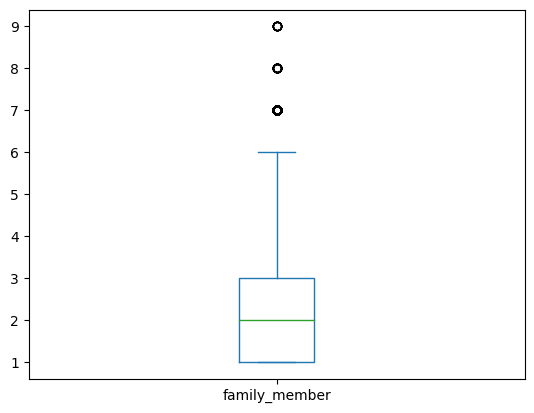

In [160]:
data.plot(kind='box', y = 'family_member')

In [161]:
# 5이상부터는 값이 적기 때문에 5로 묶어서 5이상을 뜻하기로 한다
data.loc[data.family_member > 5, 'family_member'] = 5

In [162]:
data.family_member.value_counts()

family_member
2    24367
1    21377
4    14311
3    13593
5     5280
Name: count, dtype: int64

### income 이상치 처리 

<Axes: >

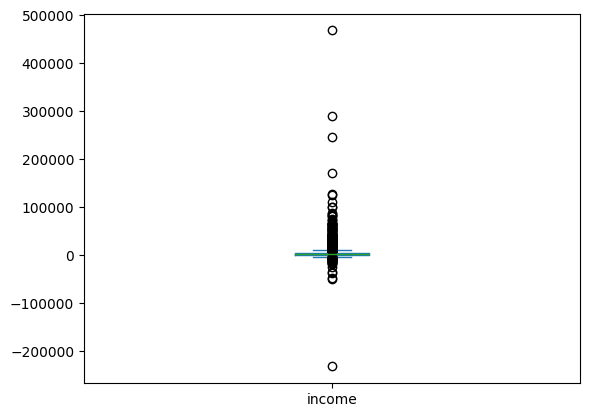

In [163]:
data.plot(kind='box', y='income')

In [164]:
# outlier 처리(IQR)

Q1= data['income'].quantile(0.25)
Q3= data['income'].quantile(0.75)
IQR= Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

((data['income'] < lower_bound) | (data['income'] > upper_bound)).sum()

3249

In [165]:
# 3249개의 이상치 처리

data = data[(data['income'] >= lower_bound) & (data['income'] <= upper_bound)]

<Axes: >

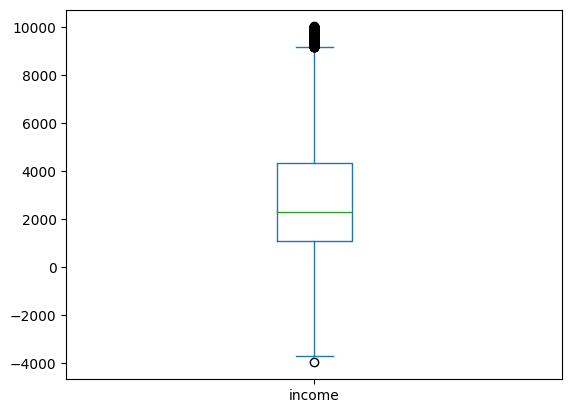

In [166]:
data.plot(kind='box', y='income')

In [167]:
data[data.income < 0] # income이 음수인 것에 대한 처리가 필요해 보인다.

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
66622,59280101,2012,8,7,3,1,1947,3,2,2,6,1,0,-1772.000000
25734,24140101,2006,2,2,2,1,1945,3,2,1,9,3,0,-218.811691
53681,49100101,2012,8,5,4,1,1965,5,2,1,1,1,0,-1328.000000
4996,4710101,2006,2,1,4,1,1953,3,2,2,0,0,0,-1200.000000
27167,25470101,2007,3,2,3,2,1964,5,3,1,9,1,0,-986.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14872,14570101,2006,2,3,4,1,1963,5,2,1,7,1,0,-595.000000
49643,45830101,2007,3,6,2,1,1947,3,2,2,6,1,0,-418.000000
69056,61430101,2016,12,4,2,1,1943,4,2,1,6,1,0,-587.000000
22416,21160101,2010,6,4,2,1,1944,5,2,1,6,1,0,-47.000000


In [168]:
len(data)

75679

In [169]:
#data.loc[data.income < 0, 'income'] = 0 # income이 음수인 경우 소득이 없음을 뜻한다고 보고 0으로 처리한다.

# 그런데 occupation을 보면 직업도 있는 상황에서 소득이 없다고 봐도 될지가 의문이다

data = data[data.income > 0] # 약 150개 정도의 데이터가 제거되었다
len(data)

75522

<Axes: >

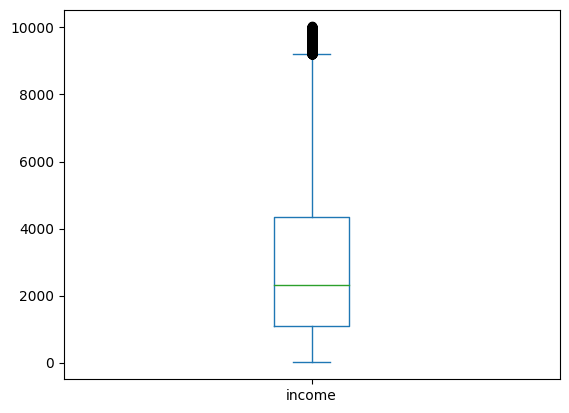

In [170]:
data.plot(kind='box', y='income')

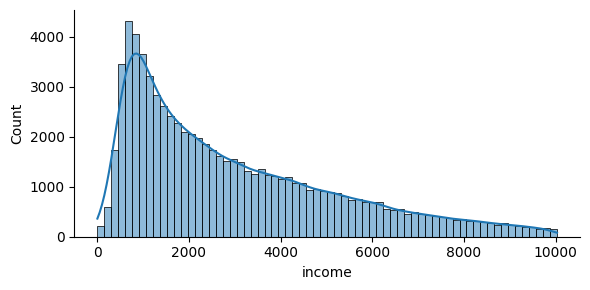

In [171]:
# 이상치를 제거하였음에도 여전히 한쪽으로 치우친 형태를 띄고 있다.
sns.displot(data.income, height=3, aspect=2, kde=True) 
plt.show()

### income 데이터 스케일링(log 변환) 

In [172]:
data['log_income']=np.log(data['income'])       # numpy의 log를 사용해서 변환한 열을 만들고
#data.drop(columns=['income'], inplace=True)    # 기존의 열을 제거 (데이터 시각화를 위해 남겨둔다)

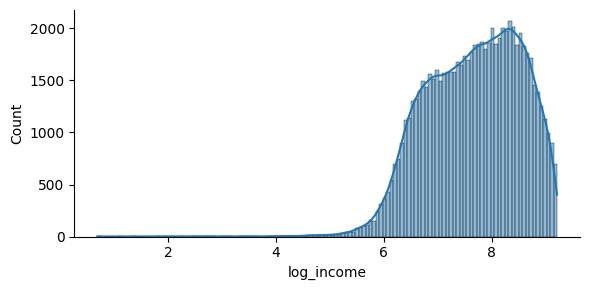

In [173]:
sns.displot(data.log_income, height=3, aspect=2, kde=True) 
plt.show()

### reason_none_worker 범주 간소화 

In [174]:
data.reason_none_worker.value_counts()

reason_none_worker
0     48292
10    16137
8      3623
9      2276
1      2133
7       950
6       914
4       604
5       283
11      259
3        44
2         7
Name: count, dtype: int64

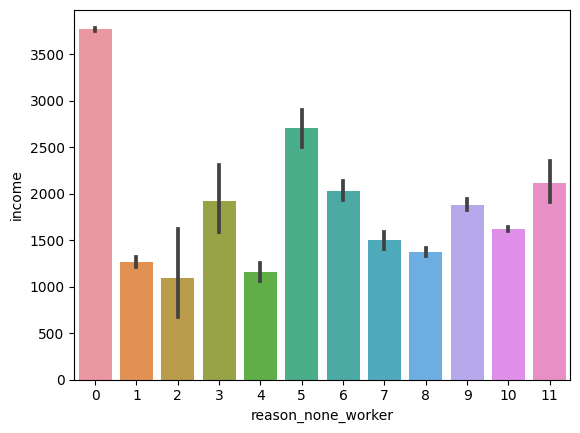

In [175]:
sns.barplot(x='reason_none_worker', y='income',data=data)
plt.show()

In [176]:
# income이 비슷하고 맥락상 비슷한 것을 기준으로 묶어서 범주를 줄인다
data.loc[data.reason_none_worker == 2, 'reason_none_worker'] = 1
data.loc[(data.reason_none_worker == 2) | (data.reason_none_worker == 4), 'reason_none_worker'] = 1
data.loc[data.reason_none_worker == 8, 'reason_none_worker'] = 7
data.loc[(data.reason_none_worker == 5) | (data.reason_none_worker == 6) | (data.reason_none_worker == 11), 'reason_none_worker'] = 3

In [177]:
data.reason_none_worker.value_counts()

reason_none_worker
0     48292
10    16137
7      4573
1      2744
9      2276
3      1500
Name: count, dtype: int64

### barplot으로 income과의 관계를 시각화 

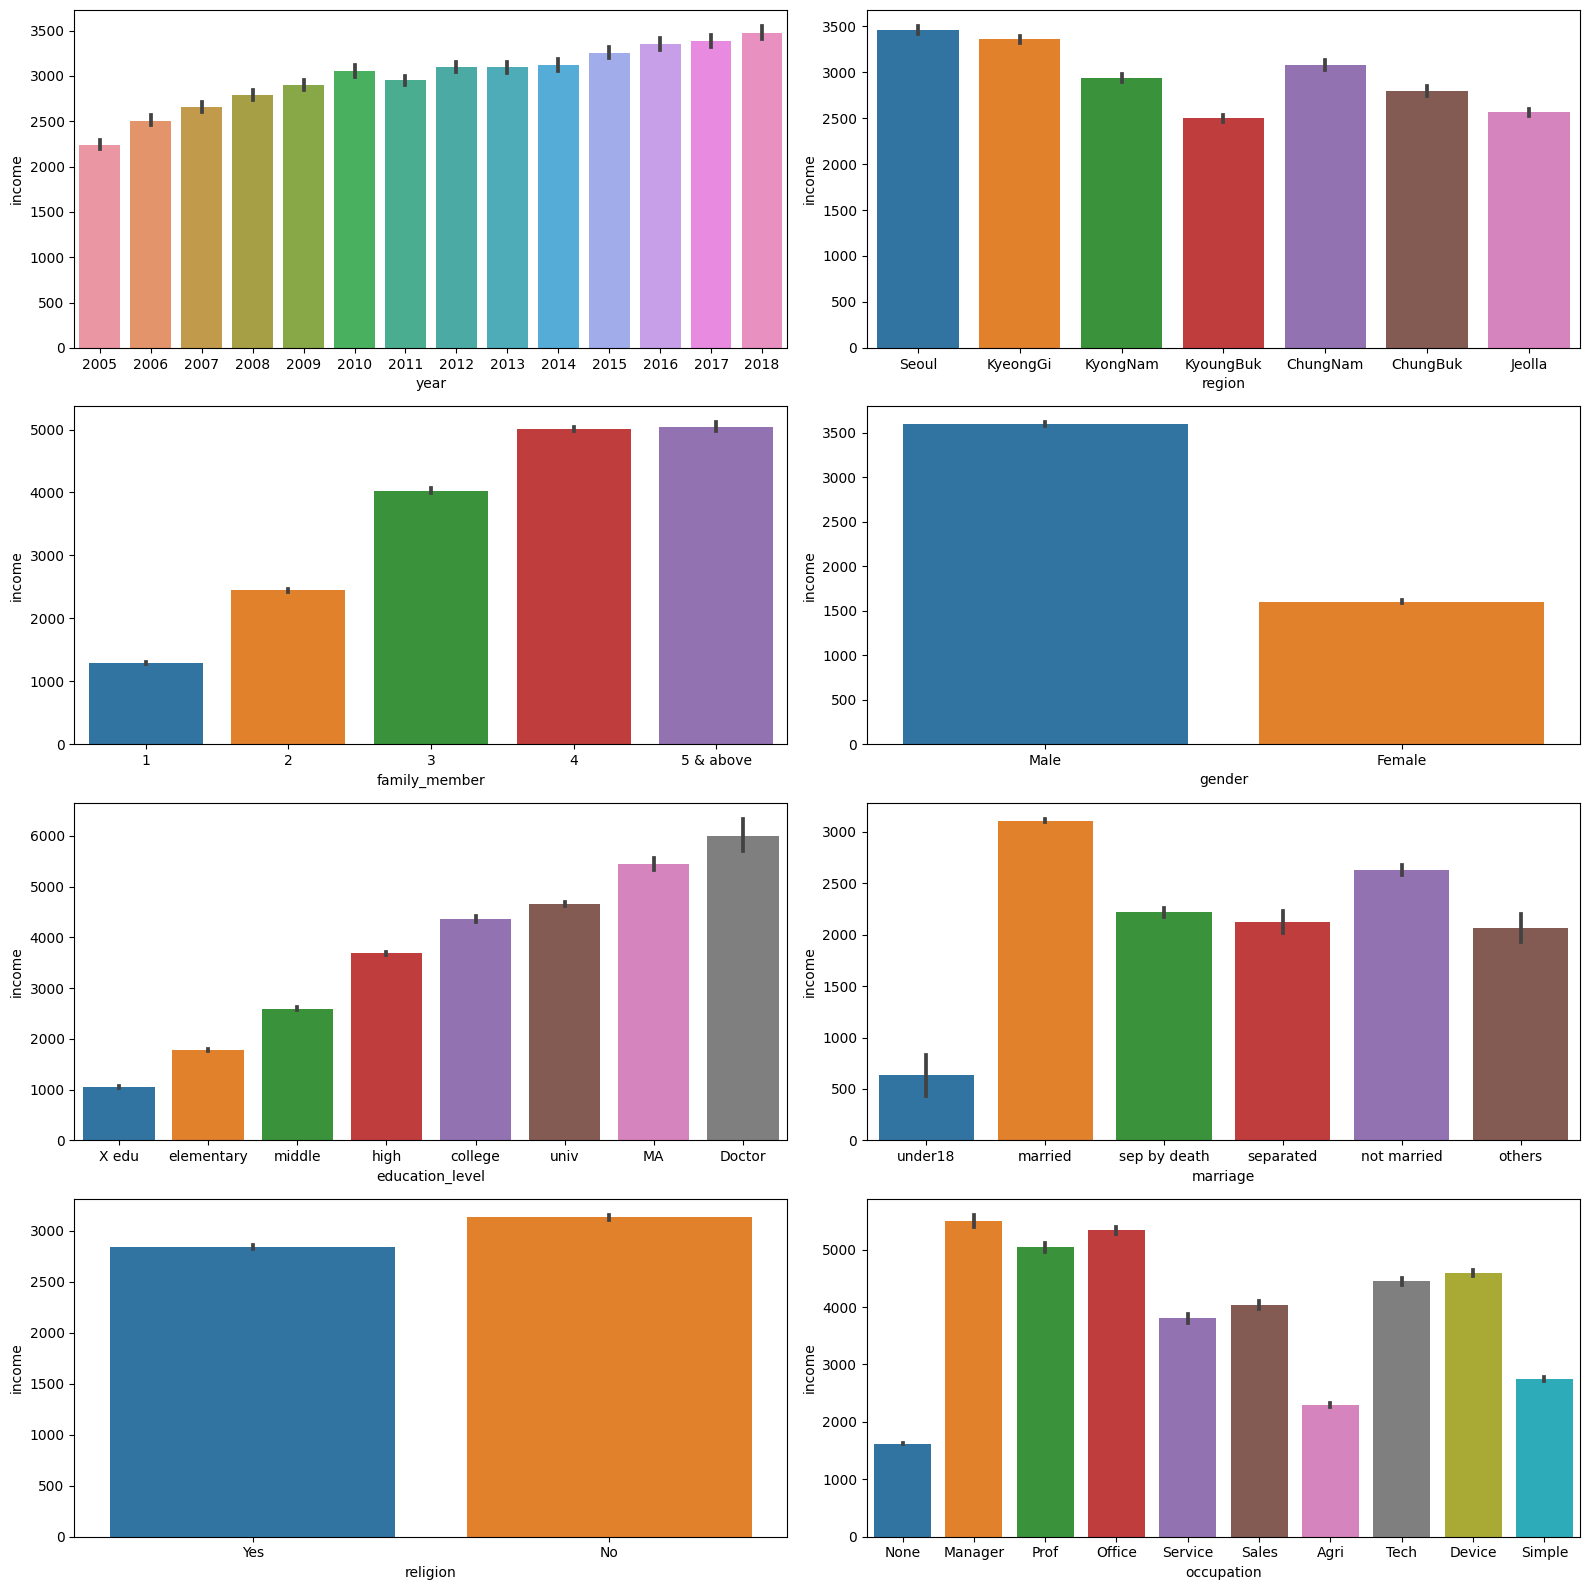

In [178]:
plt.figure(figsize=(16,16))
plt.subplot(4,2,1)                              # subplot에 4행 2열로 설정하고 순서대로 1, 2, 3...8까지 할당
sns.barplot(x='year', y='income',data=data)
plt.subplot(4,2,2)
sns.barplot(x='region', y='income',data=data)
plt.xticks(range(7), labels= ['Seoul', 'KyeongGi', 'KyongNam', 'KyoungBuk', 'ChungNam', 'ChungBuk', 'Jeolla'])
plt.subplot(4,2,3)
sns.barplot(x='family_member', y='income',data=data)
plt.xticks(range(5), labels=['1', '2', '3', '4', '5 & above'])
plt.subplot(4,2,4)
sns.barplot(x='gender', y='income',data=data)
plt.xticks(range(2), labels=["Male", "Female"])
plt.subplot(4,2,5)
sns.barplot(x='education_level', y='income',data=data)
plt.xticks(range(8), labels=["X edu", "elementary", "middle", "high", "college", "univ", "MA", "Doctor"])
plt.subplot(4,2,6)
sns.barplot(x='marriage', y='income',data=data)
plt.xticks(range(6), labels=["under18", "married", "sep by death", "separated", "not married", "others"])
plt.subplot(4,2,7)
sns.barplot(x='religion', y='income',data=data)
plt.xticks(range(2), labels=["Yes", "No"])
plt.subplot(4,2,8)
sns.barplot(x='occupation', y='income',data=data)
plt.xticks(range(10), labels=["None", "Manager","Prof", "Office", "Service", "Sales", "Agri", "Tech", "Device", "Simple"])
plt.tight_layout()
plt.show()                                      # 전체 표를 출력

### 상관계수, 히트맵

In [179]:
data.corr(numeric_only=True)

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,log_income
id,1.000000,0.213096,0.213096,0.402179,-0.131966,0.067688,-0.103687,-0.169636,-0.023667,0.010058,-0.001735,-0.067341,0.064179,-0.119225,-0.124306
year,0.213096,1.000000,1.000000,0.058788,-0.126804,0.084477,0.057988,-0.009240,0.017423,0.025740,-0.045681,-0.040599,0.200880,0.142971,0.153042
wave,0.213096,1.000000,1.000000,0.058788,-0.126804,0.084477,0.057988,-0.009240,0.017423,0.025740,-0.045681,-0.040599,0.200880,0.142971,0.153042
region,0.402179,0.058788,0.058788,1.000000,-0.067769,0.042294,-0.105660,-0.158573,-0.065938,0.048494,-0.001552,-0.055151,0.029226,-0.129131,-0.138967
family_member,-0.131966,-0.126804,-0.126804,-0.067769,1.000000,-0.498771,0.457636,0.414823,-0.264037,0.064173,0.292593,0.315666,-0.398226,0.613770,0.635976
gender,0.067688,0.084477,0.084477,0.042294,-0.498771,1.000000,-0.267560,-0.412423,0.105862,-0.145001,-0.248003,-0.226738,0.292682,-0.403107,-0.452334
year_born,-0.103687,0.057988,0.057988,-0.105660,0.457636,-0.267560,1.000000,0.637206,0.324757,0.155355,0.311398,0.507056,-0.491023,0.533805,0.576696
education_level,-0.169636,-0.009240,-0.009240,-0.158573,0.414823,-0.412423,0.637206,1.000000,0.167499,0.047968,0.101410,0.436468,-0.334322,0.549046,0.571052
marriage,-0.023667,0.017423,0.017423,-0.065938,-0.264037,0.105862,0.324757,0.167499,1.000000,0.085013,0.011671,0.074998,-0.068838,-0.092275,-0.059327
religion,0.010058,0.025740,0.025740,0.048494,0.064173,-0.145001,0.155355,0.047968,0.085013,1.000000,0.071946,0.075803,-0.086535,0.063862,0.067117


<Axes: >

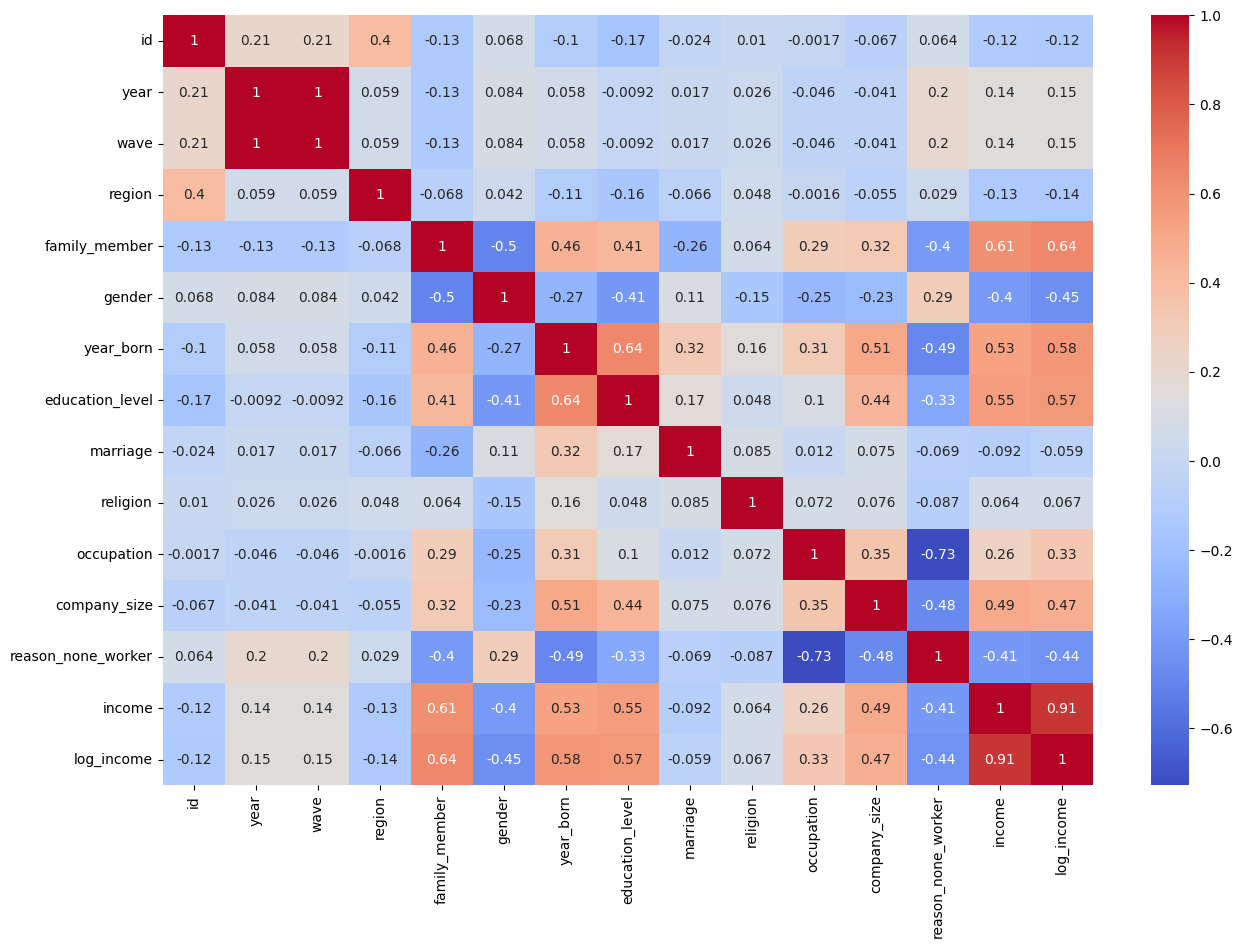

In [180]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")

현재까지 전처리된 것을 바탕으로 상관계수를 구하고 heatmap으로 표현해보았을 때,   
1. wave와 year은 1의 상관관계를 갖는다 --> 나중에 하나를 없애도 될 것 같다
2. income과 유의미한 양의 상관 관계를 보이는 것은 family_member, year_born, education_level, company_size였다
3. income과 유의미한 음의 상관 관계를 보이는 것은 gender, reason_none_worker이다

## Encoding
범주형 데이터의 경우 인코딩을 따로 해주어야 한다 
1. Label Encoding   
범주가 순서 또는 순위인 경우   
범주형 데이터의 문자열을 그대로 숫자형으로 변환   

2. One-Hot Encoding   
범주 간 관계가 독립적인 경우   
feature값의 유형에 따라 새로운 feature(더미변수)를 추가하여 고유값에 해당하는 column에만 1을 부여   
cf) label encoding이 되어 있어도 one-hot encoding을 하는 경우가 잦다   

In [181]:
data.columns

Index(['id', 'year', 'wave', 'region', 'family_member', 'gender', 'year_born',
       'education_level', 'marriage', 'religion', 'occupation', 'company_size',
       'reason_none_worker', 'income', 'log_income'],
      dtype='object')

모델 학습에 불필요해 보이는 데이터: id, year, wave    
수치형 데이터: family_member, year_born, company_size, income(log_income)  
범주형 데이터: region, gender, education_level, marriage, religion, occupation, reason_none_worker     

In [87]:
#Label encoding : year, year_born, education_level, company_size
#One_Hot encoding : region, family_member, marriage, occupation, reason_none_worker

### 1. 불필요한 column 제거

In [182]:
data = data.drop(['id', 'year', 'income'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75522 entries, 77530 to 759
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wave                75522 non-null  int64  
 1   region              75522 non-null  int64  
 2   family_member       75522 non-null  int64  
 3   gender              75522 non-null  int64  
 4   year_born           75522 non-null  int64  
 5   education_level     75522 non-null  int64  
 6   marriage            75522 non-null  int64  
 7   religion            75522 non-null  int64  
 8   occupation          75522 non-null  int64  
 9   company_size        75522 non-null  int64  
 10  reason_none_worker  75522 non-null  int64  
 11  log_income          75522 non-null  float64
dtypes: float64(1), int64(11)
memory usage: 7.5 MB


In [183]:
data.head()

,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,log_income
77530,1,3,1,2,1940,2,2,1,6,1,0,6.131226
67016,14,4,3,1,1939,5,2,2,0,0,9,7.446001
38931,8,2,3,1,1967,6,3,1,5,1,0,7.956477
72033,7,4,5,1,1947,3,2,1,6,1,0,8.364042
21862,13,4,2,1,1940,2,2,2,0,0,10,7.382746


In [184]:
data.to_csv("data1.csv", index=False)

### 2. One-Hot Encoding

In [185]:
# One-Hot Encoding : region, marriage, occupation, reason_none_worker, 
data_encoded = pd.get_dummies(data, columns=['region', 'marriage','occupation', 'reason_none_worker'], drop_first=True, dtype=int)
data_encoded.head()

,wave,family_member,gender,year_born,education_level,religion,company_size,log_income,region_2,region_3,...,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,reason_none_worker_1,reason_none_worker_3,reason_none_worker_7,reason_none_worker_9,reason_none_worker_10
77530,1,1,2,1940,2,1,1,6.131226,0,1,...,0,1,0,0,0,0,0,0,0,0
67016,14,3,1,1939,5,2,0,7.446001,0,0,...,0,0,0,0,0,0,0,0,1,0
38931,8,3,1,1967,6,1,1,7.956477,1,0,...,1,0,0,0,0,0,0,0,0,0
72033,7,5,1,1947,3,1,1,8.364042,0,0,...,0,1,0,0,0,0,0,0,0,0
21862,13,2,1,1940,2,2,0,7.382746,0,0,...,0,0,0,0,0,0,0,0,0,1


# 3단계: 모델 선정과 학습

목표 : income 예측   
모델 선정
1. 선형 회귀(Linear Regression)
2. 의사결정 나무(DecisionTree)
3. 랜덤 포레스트(Random Forest)
4. 그래디언트 부스팅(Gradient Boosting)
5. K-최근접 이웃(K-Nearest Neighbors, KNN)

In [186]:
######## 필요한 라이브러리 import ########

from sklearn.model_selection import train_test_split # 데이터 분할
from sklearn.model_selection import GridSearchCV # 그리드 서치
from sklearn.metrics import mean_squared_error # 평가 지표

# 모델
from sklearn.linear_model import LinearRegression # 1
from sklearn.tree import DecisionTreeRegressor # 2
from sklearn.ensemble import RandomForestRegressor # 3
from sklearn.ensemble import GradientBoostingRegressor # 4
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor # 5

In [187]:
data_encoded.to_csv("data.csv", index=False)

In [188]:
# 라벨 데이터를 분리
data = data_encoded.drop('log_income', axis=1) 
label = data_encoded.log_income

In [189]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [ ]:
RMSE_list = [] # 각 모델에 대한 RMSE를 저장하는 리스트

In [ ]:
# 모델 종류와 학습한 모델로 나타낸 예측 결과를 인자로 받아 train_score, test_score, RMSE를 계산하고 출력하는 함수
def score_RMSE(model, y_pred): 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # rmse 계산
                                                    # mean_squared_error: 실제값과 예측값의 차(오차)의 제곱의 평균 --> 평균 제곱 오차(MSE)
                                                    # RMSE = MSE의 제곱근

    print("train_score : {} ".format(model.score(X_train, y_train)))   
    print("test_score : {} ".format(model.score(X_test, y_test)))      
    print("RMSE: ", rmse)                                               
    RMSE_list.append((model, rmse))

In [ ]:
# 피쳐의 단위를 동일하게 만들기 위해 StandardScaler로 스케일링

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Linear Regression 

In [ ]:
# 모델 선정 및 학습
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_LR.predict(X_test)
score_RMSE(model_LR, y_pred)

train_score : 0.6447165358218935 
test_score : 0.6582198190828652 
RMSE:  0.5092481369194147


## 2. DecisionTree

In [ ]:
# 모델 선정 및 학습
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model_dt.predict(X_test)
score_RMSE(model_dt, y_pred)

# train에 대한 오버 피팅(0.98)
# 그래서인지 test score에 대해 제대로 예측하지 못하고 있음
# RMSE는 0.62로 매우 높다(오류가 많다)

train_score : 0.9856221944884939 
test_score : 0.5043697285857875 
RMSE:  0.6132462808441443


In [ ]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# 그리드 서치(Grid Search)로 최적의 하이퍼 파라미터를 찾아 성능을 개선한다
param_grid={
    "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_depth":[2, 3, 4, 5, 6, None],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(model_dt, param_grid=param_grid, cv=5, refit=True) # 교차검증 5회(cv), refit: 최적의 하이퍼파라미터 조합으로 재학습

grid_search.fit(X_train, y_train)
model_dt = grid_search.best_estimator_

print(grid_search.best_params_)     # 선택된 최적의 파라미터를 출력

y_pred = model_dt.predict(X_test)   # 재학습된 모델을 토대로 예측
score_RMSE(model_dt, y_pred)        # 성능 평가

{'max_depth': None, 'min_samples_leaf': 9, 'min_samples_split': 10}
train_score : 0.7772825638294066 
test_score : 0.6727298510720655 
RMSE:  0.49832102159006025


In [ ]:
RMSE_list

[(DecisionTreeRegressor(), 0.6160623111392092),
 (DecisionTreeRegressor(max_depth=3), 0.5797352073887282),
 (DecisionTreeRegressor(min_samples_leaf=9, min_samples_split=10),
  0.49832102159006025)]

## 3. Random Forest 

In [ ]:
# 모델 선정 및 학습
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model_RF.predict(X_test)
score_RMSE(model_RF, y_pred)

train_score : 0.9508679610603156 
test_score : 0.725832143648484 
RMSE:  0.45610441837338367


In [ ]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

# 그리드 서치(Grid Search)로 최적의 하이퍼 파라미터를 찾아 성능을 개선한다
params = {
    'n_estimators': [10, 50, 100, 200],             # 랜덤 포레스트에서 생성할 트리 개수
    'max_depth': [5, 10, 15, 20],                   # 트리의 최대 깊이(너무 깊으면 overfitting 우려)
    'max_features': [0.2, 0.4, 0.7, 1.0],           # 각 트리가 분할에 사용할 최대 특성의 개수
    'min_samples_split': [2, 5, 10, 15],            # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf' : [1, 2, 4],                 # 리프 노드가 되기 위한 최소 샘플 수
}

grid_search = GridSearchCV(model_RF, param_grid=params, cv=3, refit=True) # 교차검증 5회(cv), refit: 최적의 하이퍼파라미터 조합으로 재학습

grid_search.fit(X_train, y_train)
model_RF = grid_search.best_estimator_

print(grid_search.best_params_)     # 선택된 최적의 파라미터를 출력

y_pred = model_RF.predict(X_test)   # 재학습된 모델을 토대로 예측
score_RMSE(model_RF, y_pred)        # 성능 평가

{'max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
train_score : 0.8967065599504618 
test_score : 0.7453408884756694 
RMSE:  0.43957766820485183


## 4. Gradient Boosting

In [ ]:
# 모델 선정 및 학습
model_gb = GradientBoostingRegressor()
model_xgb = XGBRegressor()
model_lgb = LGBMRegressor()
models = [model_gb, model_xgb, model_lgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_RMSE(model, y_pred)

train_score : 0.694708788205744 
test_score : 0.7037533076530524 
RMSE:  0.47411398525133147
train_score : 0.7655567891206121 
test_score : 0.7266112973824923 
RMSE:  0.45545585893077173
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 60417, number of used features: 37
[LightGBM] [Info] Start training from score 7.671187
train_score : 0.7221449673563971 
test_score : 0.7179072675095499 
RMSE:  0.4626493538626099


In [ ]:
model_xgb=XGBRegressor()

# 그리드 서치(Grid Search)로 최적의 하이퍼 파라미터를 찾아 성능을 개선
param_grid={
   'n_estimators' : [100,200,300],
   'learning_rate' : [0.01,0.1],
   'max_depth' : [7,8,9,10],
   'gamma' : [0,1,2,3],
}

# 교차검증 3회(cv), refit: 최적의 하이퍼 파라미터 조합으로 재학습
grid_search = GridSearchCV(model_xgb, param_grid=param_grid, cv=3, scoring='r2', refit=True, n_jobs=-1)

grid_search.fit(X_train, y_train)
model_xgb = grid_search.best_estimator_

# 선택된 최적의 파라미터를 출력
print(grid_search.best_params_)

model_xgb.fit(X_train, y_train)

# 재학습된 모델을 토대로 예측
y_pred = model_xgb.predict(X_test)

# 성능 평가
score_RMSE(model_xgb, y_pred)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
train_score : 0.857914710447505 
test_score : 0.745746524752135 
RMSE:  0.43922743587022317


## 5. KNN(K-Nearest Neighbors)

In [ ]:
# 모델 선정 및 학습
model_KNN = KNeighborsRegressor()
model_KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model_KNN.predict(X_test)
score_RMSE(model_KNN, y_pred)

train_score : 0.7857230369932547 
test_score : 0.68083804546056 
RMSE:  0.4921092961948731


In [ ]:
model_KNN = KNeighborsRegressor()
model_KNN.fit(X_train, y_train)

# 그리드 서치(Grid Search)로 최적의 하이퍼 파라미터를 찾아 성능을 개선한다
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 50, 100], # 이웃의 수 후보값
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['distance'],                 # 가중치 거리 계산
    'metric': ['euclidean', 'manhattan'],    # 거리 측정 방법 후보값
}

grid_search = GridSearchCV(model_KNN, param_grid=param_grid, cv=5, refit=True) # 교차검증 5회(cv), refit: 최적의 하이퍼파라미터 조합으로 재학습

grid_search.fit(X_train, y_train)
model_KNN = grid_search.best_estimator_

print(grid_search.best_params_)     # 선택된 최적의 파라미터를 출력

y_pred = model_KNN.predict(X_test)  # 재학습된 모델을 토대로 예측
score_RMSE(model_KNN, y_pred)       # 성능 평가

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
train_score : 0.9856221944884939 
test_score : 0.7019250300288784 
RMSE:  0.47557472514776755


In [ ]:
RMSE_list

[(DecisionTreeRegressor(), 0.6132462808441443),
 (RandomForestRegressor(), 0.45610441837338367),
 (KNeighborsRegressor(), 0.4921092961948731),
 (KNeighborsRegressor(metric='manhattan', n_neighbors=10, weights='distance'),
  0.47557472514776755),
 (RandomForestRegressor(max_depth=20, max_features=0.2, n_estimators=200),
  0.43957766820485183),
 (LinearRegression(), 0.5092481369194147),
 (GradientBoostingRegressor(), 0.47411398525133147),
 (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,

In [ ]:
sorted(RMSE_list, key = lambda x: x[1])

[(XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
  0.43922743587022317),
 (RandomForestRegressor(max_depth=20, max_features=0.2, n_estimators=200),
  0.43957766820485183),
 (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=N